In [23]:
# Statmodels implementation of Linear regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [7]:
df = pd.read_csv('..\data\cars24-car-price-cleaned-new.csv')

In [9]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   km_driven         19820 non-null  int64  
 2   mileage           19820 non-null  float64
 3   engine            19820 non-null  float64
 4   max_power         19820 non-null  float64
 5   age               19820 non-null  float64
 6   make              19820 non-null  object 
 7   model             19820 non-null  object 
 8   Individual        19820 non-null  int64  
 9   Trustmark Dealer  19820 non-null  int64  
 10  Diesel            19820 non-null  int64  
 11  Electric          19820 non-null  int64  
 12  LPG               19820 non-null  int64  
 13  Petrol            19820 non-null  int64  
 14  Manual            19820 non-null  int64  
 15  5                 19820 non-null  int64  
 16  >5                19820 non-null  int64 

<Axes: title={'center': 'distribution of selling price barplot'}, xlabel='selling_price'>

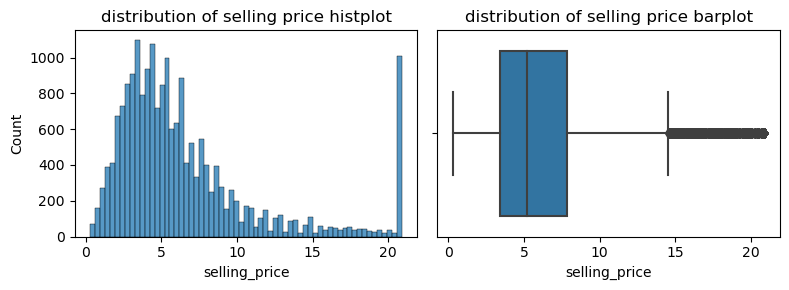

In [16]:
plt.figure(figsize=(8, 3), tight_layout= True)

plt.subplot(1, 2, 1)
plt.title("distribution of selling price histplot")
sns.histplot(x='selling_price', data=df)

plt.subplot(1, 2, 2)
plt.title("distribution of selling price barplot")
sns.boxplot(x='selling_price', data=df)

### Treat categorical variable into numberical

In [19]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

* there are lot of unique models so we cannot apply One hot encoding as it will increse more number of dimentions
* Label Encoding also can not be applying as there is no ordering associated
* Hence we apply target encoding to it

## make

<Axes: title={'center': 'make before target encoding'}, xlabel='make'>

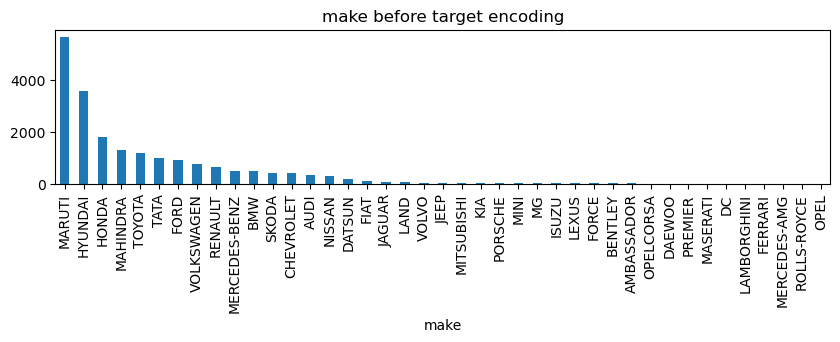

In [21]:
plt.figure(figsize=(10,2))
plt.title("make before target encoding")
df['make'].value_counts().plot(kind='bar')

In [25]:
df['make'] = np.round(df.groupby('make')['selling_price'].transform('mean'), 2)

<Axes: title={'center': 'make after target encoding'}, xlabel='make'>

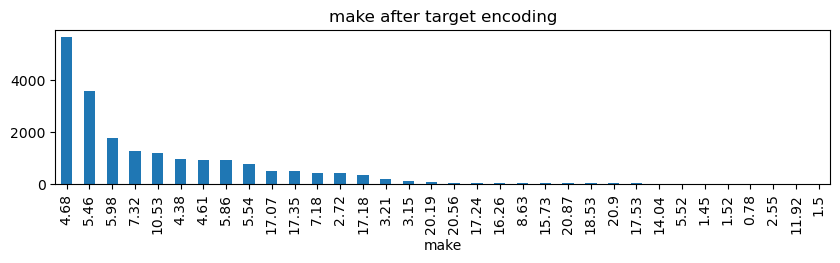

In [27]:
plt.figure(figsize=(10,2))
plt.title("make after target encoding")
df['make'].value_counts().plot(kind='bar')

## model

<Axes: title={'center': 'model before target encoding - first 30 models as there are lot of models '}, xlabel='model'>

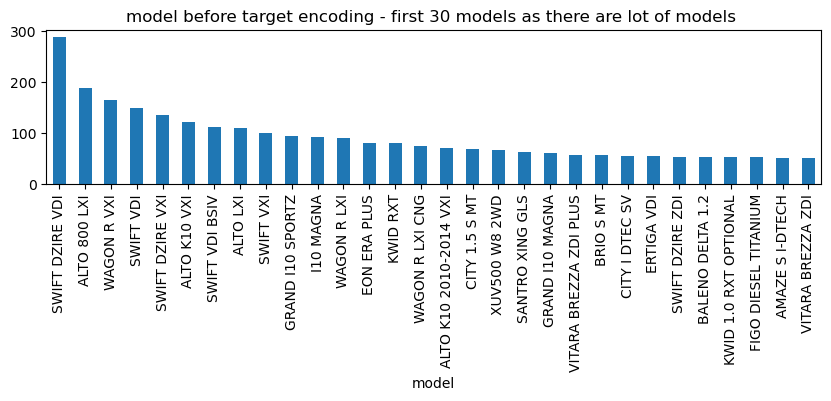

In [30]:
plt.figure(figsize=(10,2))
plt.title("model before target encoding - first 30 models as there are lot of models ")
df['model'].value_counts()[:30].plot(kind='bar')

In [38]:
df['model'] = np.round(df.groupby('model')['selling_price'].transform('mean'), 2)

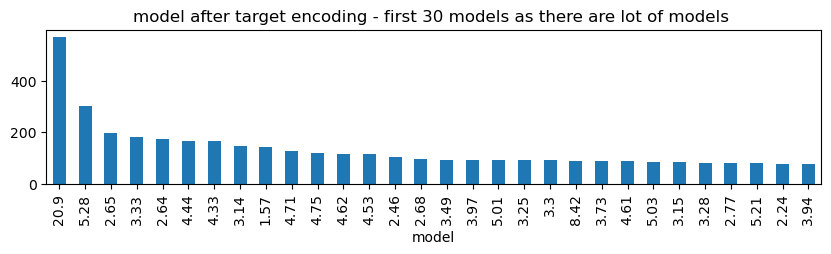

In [40]:
plt.figure(figsize=(10,2))
plt.title("model after target encoding - first 30 models as there are lot of models ")
df['model'].value_counts().head(30).plot(kind='bar')
plt.show()

### So data looks like now

In [41]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,4.68,1.18,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,5.46,4.82,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,5.46,3.39,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,4.68,2.24,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,5.86,6.78,0,0,1,0,0,0,1,1,0


In [43]:
X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:46:26   Log-Likelihood:                -24524.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5834      0.009    729.189      0.0

## Multicollinearity and implementation
* When one or more input variables exhibhit strong correlation
* One variable is enough to be part of the model.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_t.head()

,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.158764,-0.896858,0.040307,0.404950,0.486954,-0.167860,-0.474403,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,-2.023235,0.448465,-0.428013
1,-0.429161,0.231029,-0.922002,-0.692532,-0.763433,-0.525636,-0.591858,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
2,1.316242,0.476821,-0.439884,-0.209961,-0.450836,-0.608200,-0.455183,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013
3,-0.277293,-0.308795,-0.540164,-0.252291,-1.076029,-0.200886,-0.314237,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
4,-0.190317,-0.759031,0.032593,0.264590,1.112147,-0.310971,-0.711448,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,0.448465,-0.428013


In [51]:
vif['Features'] = X_t.columns

In [53]:
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

In [59]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Petrol,18.29
9,Diesel,17.29
15,>5,13.04
14,5,11.75
2,engine,6.30
6,model,6.16
3,max_power,5.02
5,make,3.33
1,mileage,3.24
4,age,1.92


In [60]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.813e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:52:39   Log-Likelihood:                -24527.
No. Observations:               15856   AIC:                         4.909e+04
Df Residuals:                   15840   BIC:                         4.921e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5834      0.009  

In [62]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

Reached threshold
Highest vif: Features    engine
VIF           6.12
Name: 0, dtype: object
Current adj.R2 0.8320226253734144
Features removed: 1
List of features removed: ['year']


In [64]:
print(vif)
print(sm_model.summary())

            Features   VIF
0             engine  6.12
1          max_power  4.20
3            mileage  2.84
2               make  2.41
4             Diesel  2.02
7                  5  1.68
6             Manual  1.64
5                age  1.31
8           Electric  1.22
9          km_driven  1.20
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6545.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:55:17   Log-Likelihood:                -33368.
No. Observations:               15856   AIC:                         6.676e+04
Df Residuals:                   15843   BIC:                         

In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

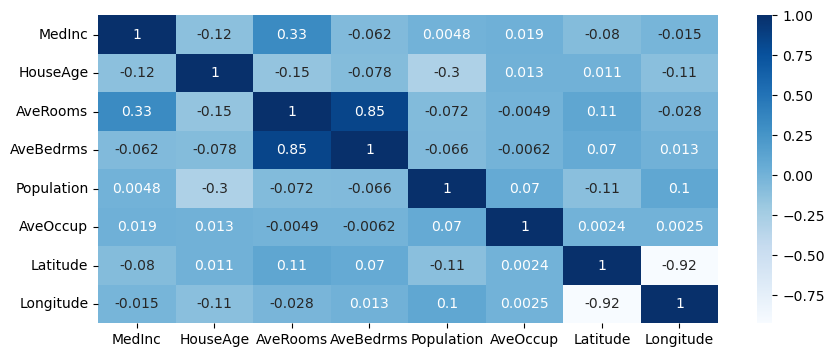

In [79]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

In [80]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [85]:
# Calculate VIF for each feature
X_const = add_constant(X)  # Add a constant column for the intercept term
X_const.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [86]:
X_const.columns

Index(['const', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'],
      dtype='object')

In [91]:
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
X_const.shape[1]

9

In [92]:
variance_inflation_factor()

<function statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)>

In [ ]:
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif)
